In [ ]:
!pip install mediapipe -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 40.9 MB/s eta 0:00:00


In [ ]:
!pip install dlib -q

In [ ]:
!pip install face-recognition -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import cv2
import matplotlib.pyplot as plt
import mediapipe

In [ ]:
import face_recognition

Import the MediaPipe library.
Create a face detection pipeline.
Start the face detection pipeline.
Get the face landmarks of the detected face.
Calculate the face encodings of the face landmarks.
Save the face encodings to a file.
Here is an example of how to encode a face in Python using the MediaPipe


Use code with caution. Learn more
The MediaPipe library provides a pre-trained model to generate face encodings. This model is trained on a large dataset of faces, so it can be used to recognize faces from different angles and lighting conditions.

Once you have encoded the faces, you can use them to train a machine learning model for face recognition. There are many different machine learning algorithms that you can use for this task. Some popular algorithms include support vector machines (SVMs), random forests, and deep neural networks.

The choice of algorithm will depend on the size of your dataset and the accuracy that you need. If you have a small dataset, you may want to use a simpler algorithm like SVMs. If you have a large dataset, you can use a more complex algorithm like deep neural networks.

Once you have trained the machine learning model, you can use it to recognize faces in new images. To do this, you can use the face_recognition.face_distance() function to compare the face encodings of the new image to the face encodings of the training data. The lower the face distance, the more likely it is that the new image is of the same person.

In [ ]:
path = "/content/girl.jpg"
img = cv2.imread( path )
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
mp_face_detection = mediapipe.solutions.face_detection
face_detector =  mp_face_detection.FaceDetection( min_detection_confidence=0.6)
results = face_detector.process(img)

In [ ]:
type(results.detections[0])

mediapipe.framework.formats.detection_pb2.Detection

In [ ]:
mp_face_detection = mediapipe.solutions.face_detection
# Create a face detection pipeline
face_detection_pipeline = mp_face_detection.FaceDetection()

In [ ]:
face_landmarks = face_detection_pipeline.process(img)
face_landmarks

mediapipe.python.solution_base.SolutionOutputs

In [ ]:
face_landmarks[0]

mediapipe.python.solution_base.SolutionOutputs[0]

In [ ]:
face_recognition.face_encodings(face_image=img, known_face_locations=face_landmarks)

In [ ]:
# Calculate the face encodings of the face landmarks
face_encodings = face_recognition.face_encodings(image, face_landmarks)

In [ ]:
import mediapipe as mp

mp_face_detection = mp.solutions.face_detection

# Create a face detection pipeline
face_detection_pipeline = mp_face_detection.FaceDetection()

# Start the face detection pipeline
face_detection_pipeline.start()

# Get the face landmarks of the detected face
face_landmarks = face_detection_pipeline.process(image)

# Calculate the face encodings of the face landmarks
face_encodings = face_recognition.face_encodings(image, face_landmarks)

# Save the face encodings to a file
with open("face_encodings.pkl", "wb") as f:
    pickle.dump(face_encodings, f)

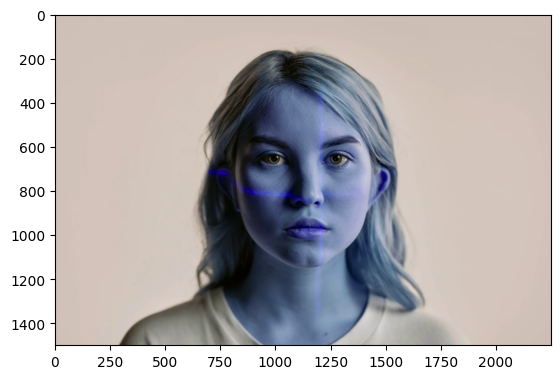

In [ ]:
plt.imshow(img)  # inverted image

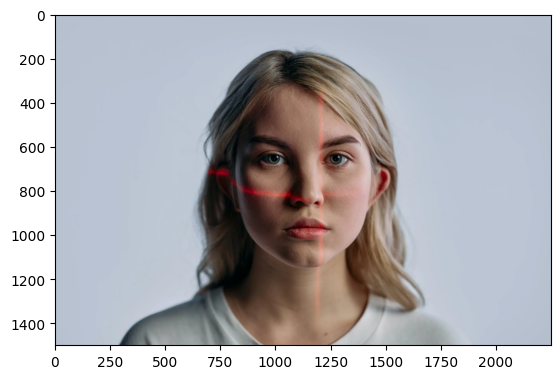

In [ ]:
plt.imshow(img[:, :, ::-1])

# Facial landmarks

In [ ]:
faceModule = mediapipe.solutions.face_mesh

In [ ]:
face_mesh = faceModule.FaceMesh(static_image_mode=True)
results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
landmarks = results.multi_face_landmarks[0]

In [ ]:
facial_areas = {
    'Contours': faceModule.FACEMESH_CONTOURS
    , 'Lips': faceModule.FACEMESH_LIPS
    , 'Face_oval': faceModule.FACEMESH_FACE_OVAL
    , 'Left_eye': faceModule.FACEMESH_LEFT_EYE
    , 'Left_eye_brow': faceModule.FACEMESH_LEFT_EYEBROW
    , 'Right_eye': faceModule.FACEMESH_RIGHT_EYE
    , 'Right_eye_brow': faceModule.FACEMESH_RIGHT_EYEBROW
    , 'Tesselation': faceModule.FACEMESH_TESSELATION
}

In [ ]:
def plot_landmark(img_base, facial_area_name, facial_area_obj):

    print(facial_area_name, ":")

    img = img_base.copy()

    for source_idx, target_idx in facial_area_obj:
        source = landmarks.landmark[source_idx]
        target = landmarks.landmark[target_idx]

        relative_source = (int(img.shape[1] * source.x), int(img.shape[0] * source.y))
        relative_target = (int(img.shape[1] * target.x), int(img.shape[0] * target.y))

        cv2.line(img, relative_source, relative_target, (255, 255, 255), thickness = 2)

    fig = plt.figure(figsize = (15, 15))
    plt.axis('off')
    plt.imshow(img[:, :, ::-1])
    plt.show()

In [ ]:
faceModule.FACEMESH_LEFT_EYE

Tesselation :


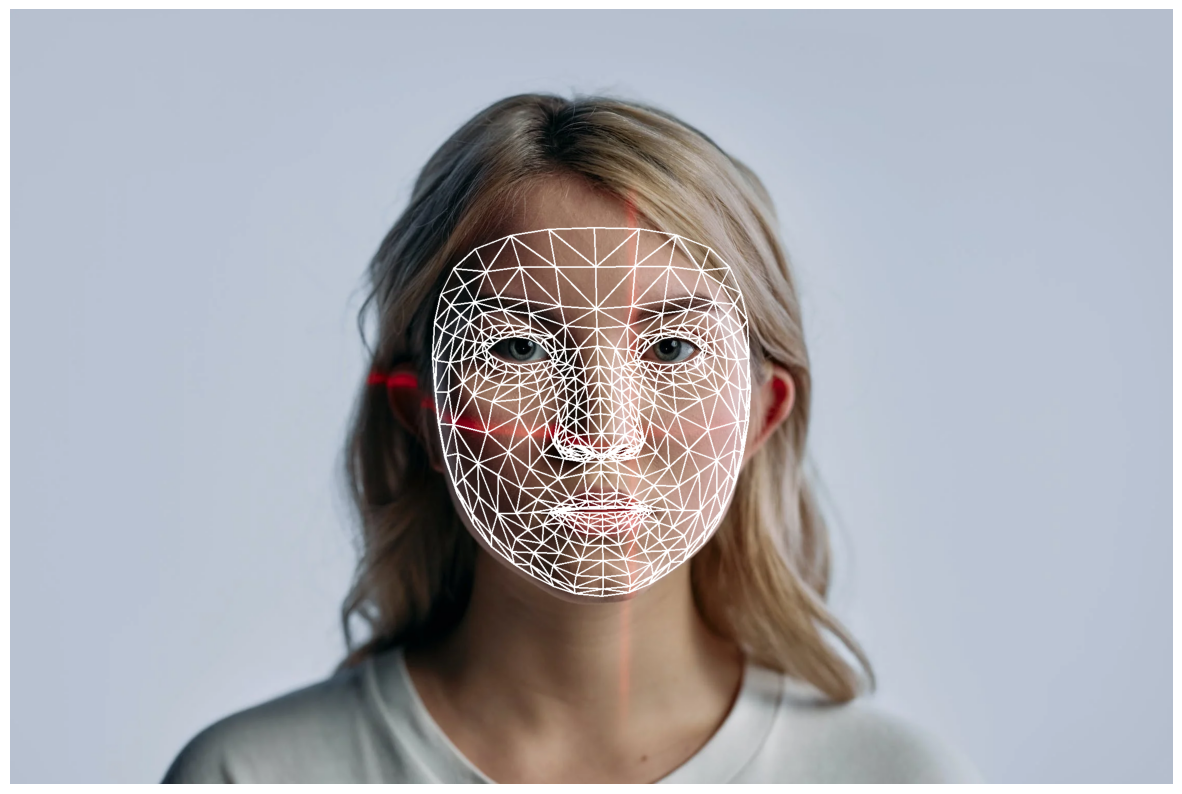

In [ ]:

facial_area = "Tesselation"
facial_area_obj = faceModule.FACEMESH_TESSELATION
plot_landmark(img_base, facial_area, facial_area_obj)

Contours :


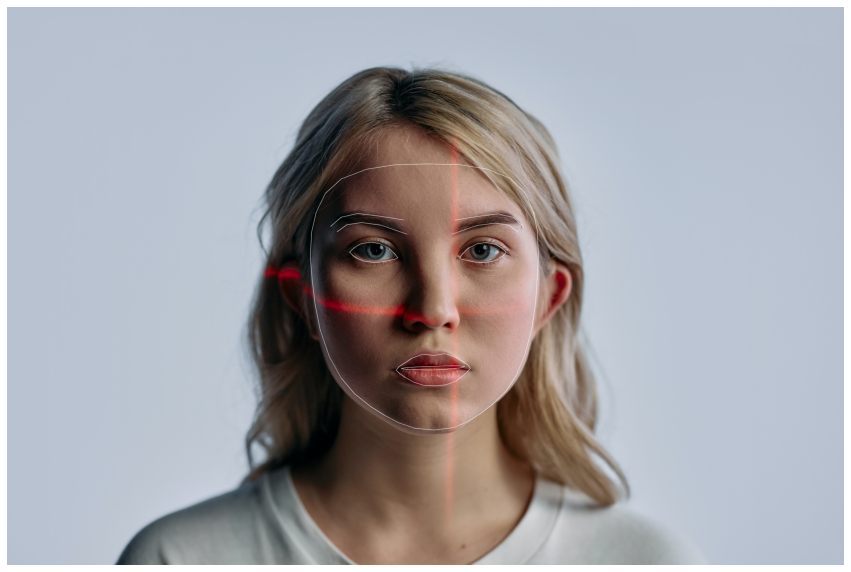

Lips :


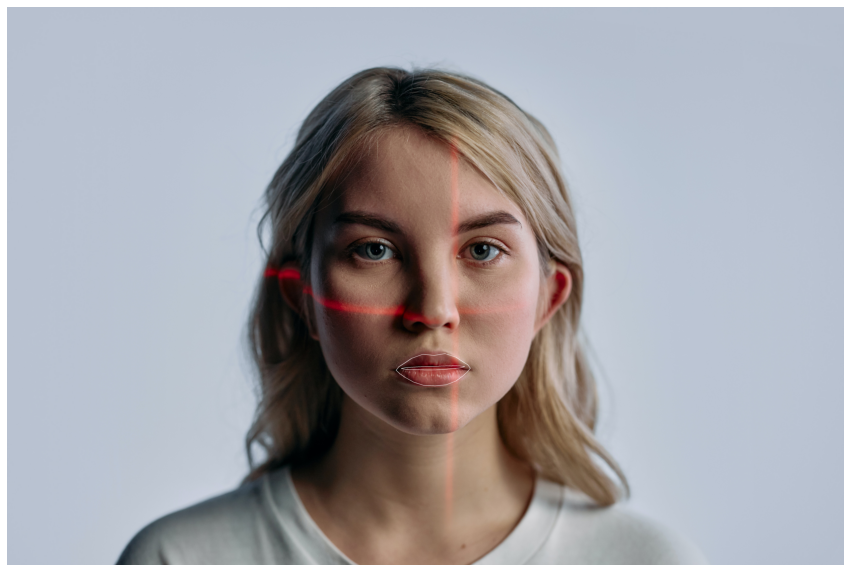

Face_oval :


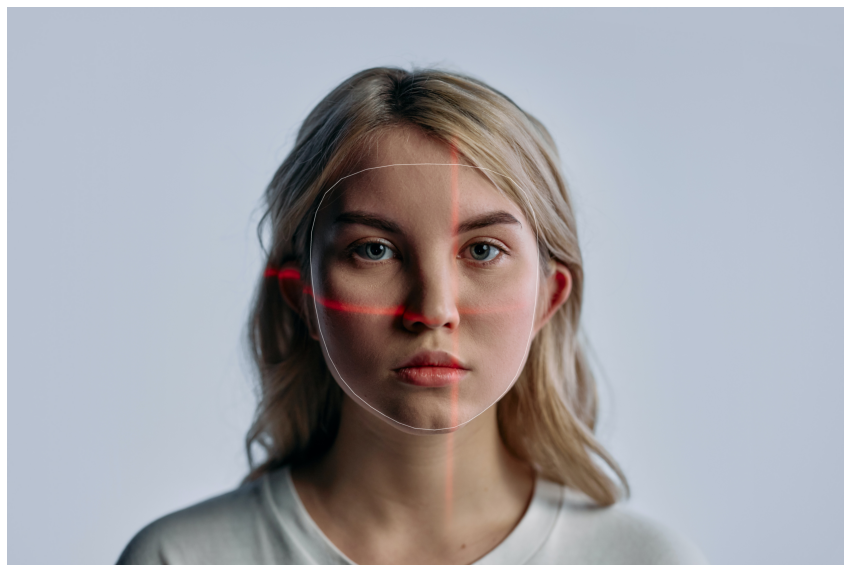

Left_eye :


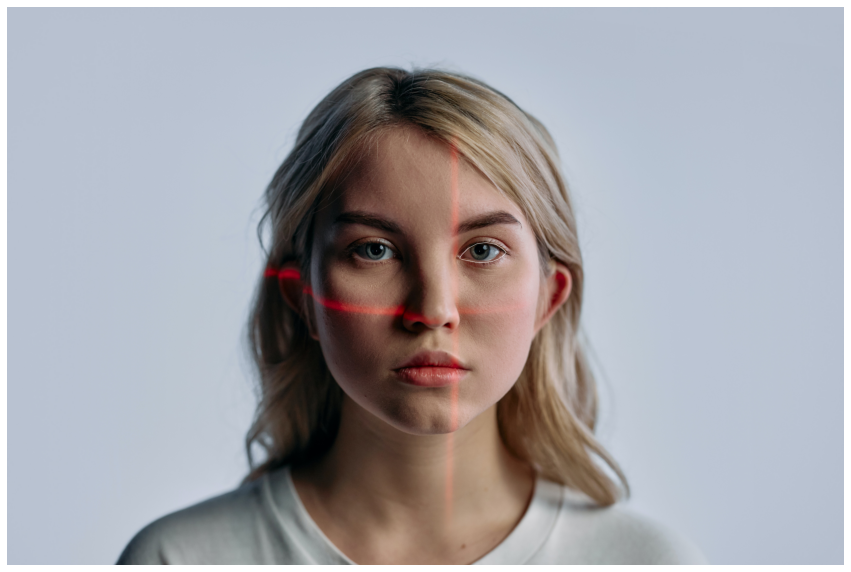

Left_eye_brow :


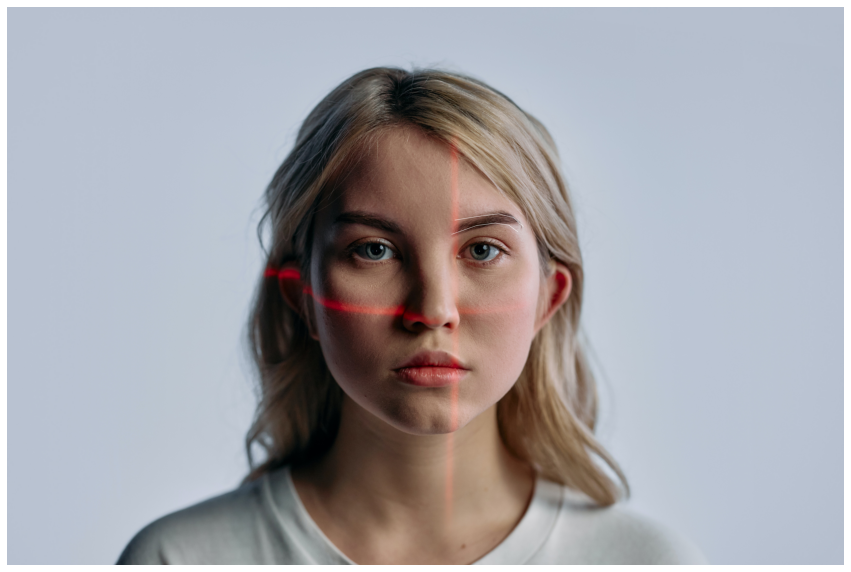

Right_eye :


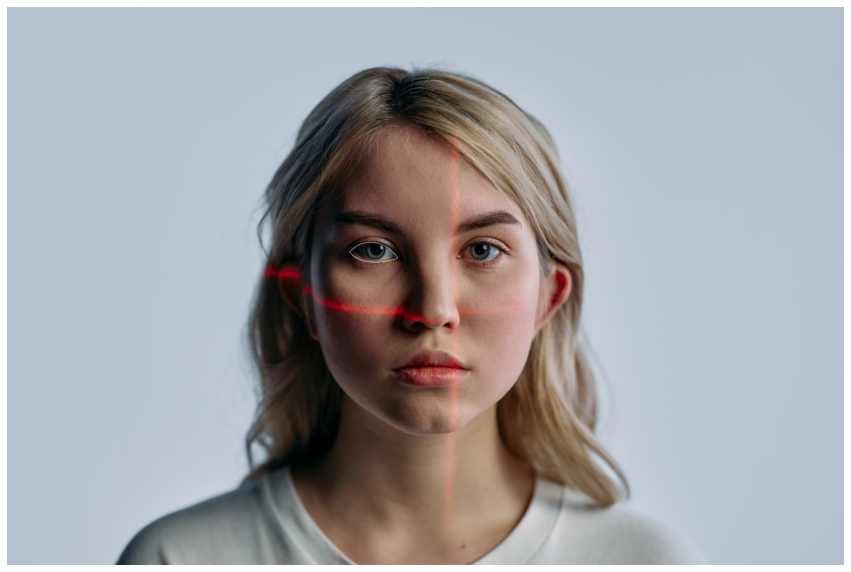

Right_eye_brow :


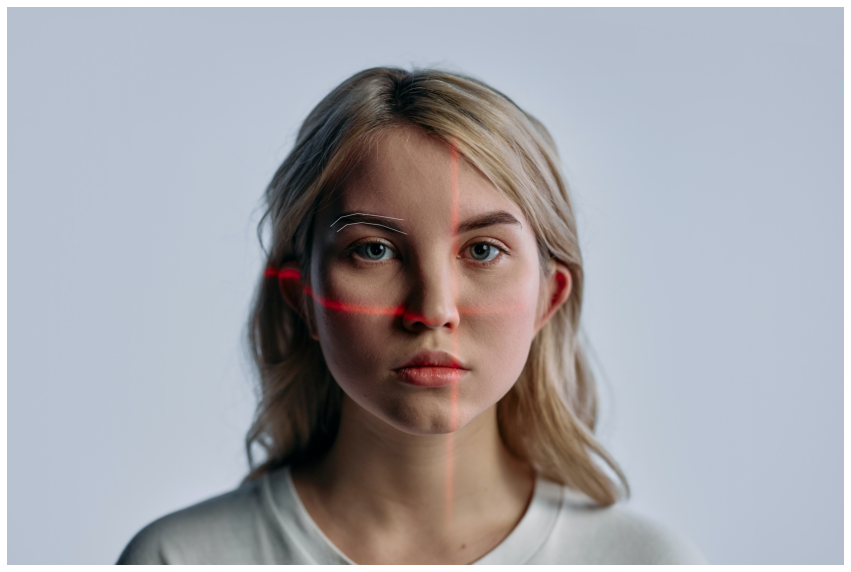

Tesselation :


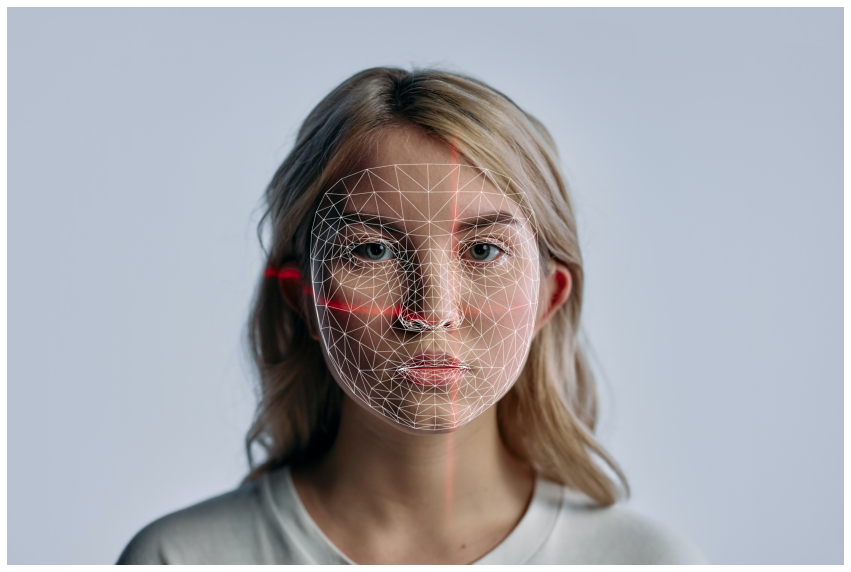

In [ ]:
for facial_area in facial_areas.keys():
    facial_area_obj = facial_areas[facial_area]
    plot_landmark(img_base, facial_area, facial_area_obj)

# Landmarks with pixel by pixel

In [ ]:
#for landmark in landmarks.landmark:
for idx, landmark in enumerate(landmarks.landmark):
    x = landmark.x
    y = landmark.y

    relative_x = int(img.shape[1] * x)
    relative_y = int(img.shape[0] * y)

    #print(relative_x, relative_y)
    cv2.circle(img, (relative_x, relative_y), 5, (0, 0, 255), -1)

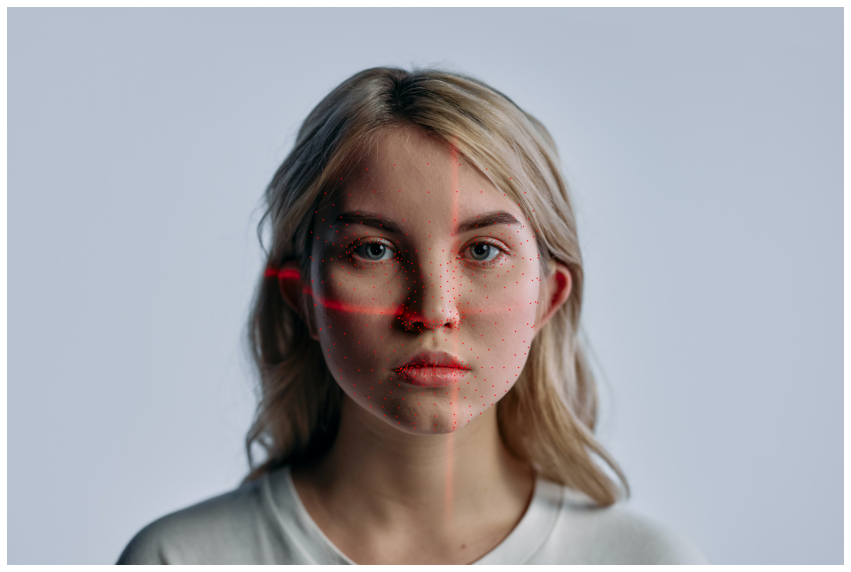

In [ ]:
fig = plt.figure(figsize = (15, 15))
plt.axis('off')
plt.imshow(img[:, :, ::-1])

# Face detection

In [ ]:
img = img_base.copy()

In [ ]:
mp_face_detection = mediapipe.solutions.face_detection
face_detector =  mp_face_detection.FaceDetection( min_detection_confidence=0.6)

In [ ]:
results = face_detector.process(img)

In [ ]:
if results.detections:
    for face in results.detections:
        confidence = face.score
        bounding_box = face.location_data.relative_bounding_box

        x = int(bounding_box.xmin * img.shape[1])
        w = int(bounding_box.width * img.shape[1])
        y = int(bounding_box.ymin * img.shape[0])
        h = int(bounding_box.height * img.shape[0])

        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), thickness = 2)

        #------------------------------

        landmarks = face.location_data.relative_keypoints

        right_eye = (int(landmarks[0].x * img.shape[1]), int(landmarks[0].y * img.shape[0]))
        left_eye = (int(landmarks[1].x * img.shape[1]), int(landmarks[1].y * img.shape[0]))
        nose = (int(landmarks[2].x * img.shape[1]), int(landmarks[2].y * img.shape[0]))
        mouth = (int(landmarks[3].x * img.shape[1]), int(landmarks[3].y * img.shape[0]))
        right_ear = (int(landmarks[4].x * img.shape[1]), int(landmarks[4].y * img.shape[0]))
        left_ear = (int(landmarks[5].x * img.shape[1]), int(landmarks[5].y * img.shape[0]))



        cv2.circle(img, right_eye, 15, (0, 0, 255), -1)
        cv2.circle(img, left_eye, 15, (0, 0, 255), -1)
        cv2.circle(img, nose, 15, (0, 0, 255), -1)
        cv2.circle(img, mouth, 15, (0, 0, 255), -1)
        cv2.circle(img, right_ear, 15, (0, 0, 255), -1)
        cv2.circle(img, left_ear, 15, (0, 0, 255), -1)



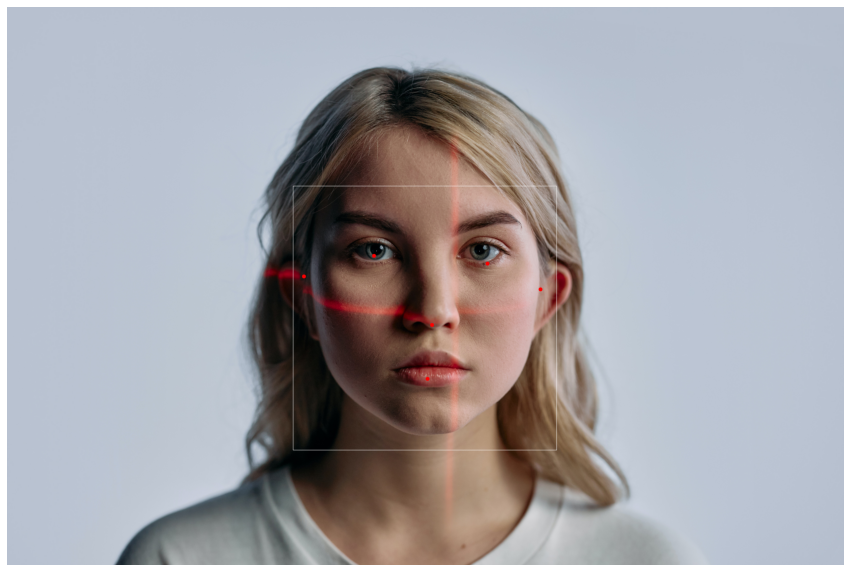

In [ ]:
fig = plt.figure(figsize = (15, 15))
plt.axis('off')
plt.imshow(img[:, :, ::-1])


Face detection using mediapipe
Face-alignment  using mediapipe TRy

https://sefiks.com/2021/04/27/deep-face-detection-with-retinaface-in-python/

https://sefiks.com/2020/05/22/fine-tuning-the-threshold-in-face-recognition/

https://github.com/serengil/retinaface

Detection and Alignment

https://sefiks.com/2020/02/23/face-alignment-for-face-recognition-in-python-within-opencv/

Normalization



 Representation

Labeled Faces in the Wild for Face Recognition

https://sefiks.com/2020/08/27/labeled-faces-in-the-wild-for-face-recognition/


https://sefiks.com/2020/05/01/a-gentle-introduction-to-face-recognition-in-deep-learning/
